In [2]:
import pandas as pd 
import numpy as np
import sklearn.datasets 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [7]:
# Load the California Housing Prices dataset
housing = sklearn.datasets.fetch_california_housing(as_frame=True) 
df = housing.frame  
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


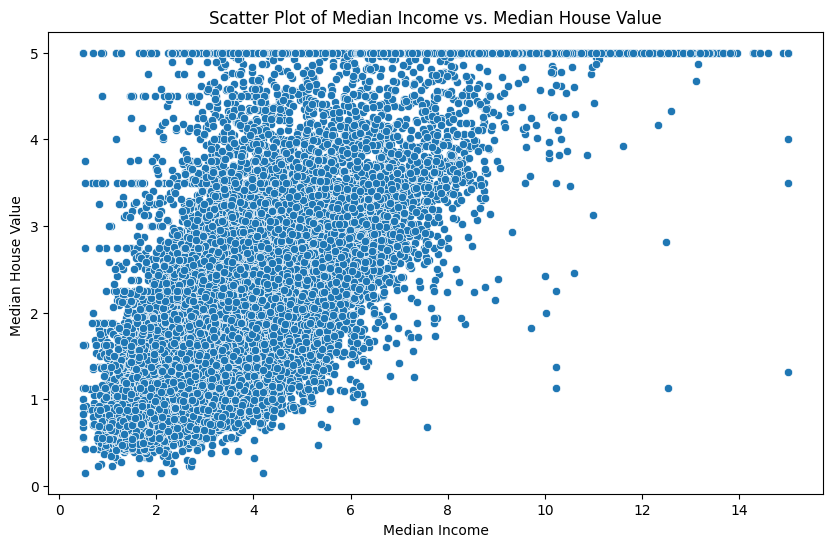

In [10]:

# Independent variable (feature)
X = df['MedInc']
# Dependent variable (target)
y = df['MedHouseVal']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y)
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value ')
plt.show()


In [8]:
# Independent variable (feature)
X = df[['MedInc']]  # Median Income
y = df['MedHouseVal']  # Median House Value

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
theta_0 = model.intercept_
theta_1 = model.coef_[0]
print(f'Optimal Parameters: theta_0 = {theta_0}, theta_1 = {theta_1}')


Optimal Parameters: theta_0 = 0.44459729169078677, theta_1 = 0.4193384939381274


Mean Squared Error (MSE): 0.7091157771765548
Mean Absolute Error (MAE): 0.629908653009376
R-squared (R^2): 0.45885918903846656


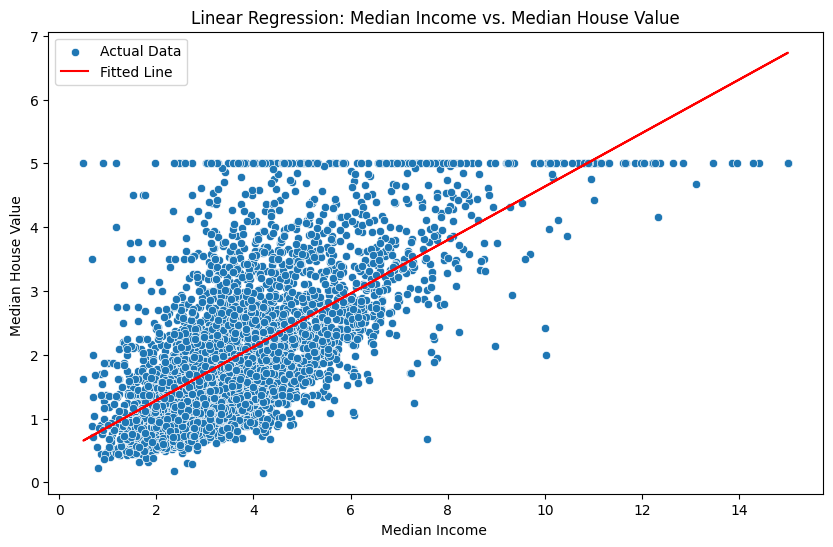

In [29]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')

# Visualize the fitted line along with the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['MedInc'], y=y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Fitted Line')
plt.title('Linear Regression: Median Income vs. Median House Value')
plt.xlabel('Median Income ')
plt.ylabel('Median House Value ')
plt.legend()
plt.show()


In [30]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error (MSE) on Training Set: {mse_train}')

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate MSE for testing set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on Testing Set: {mse_test}')


Mean Squared Error (MSE) on Training Set: 0.6991447170182823
Mean Squared Error (MSE) on Testing Set: 0.7091157771765548


Explanation of Loss Function:
# Mean Squared Error (MSE): It represents the average squared difference between the actual values and the predicted values. A lower MSE indicates that the predictions are closer to the actual values, which means better model performance.


# Training Set MSE: Evaluates how well the model fits the training data. High MSE could indicate underfitting (the model is too simple).

# Testing Set MSE: Evaluates how well the model generalizes to unseen data. High MSE here could indicate overfitting (the model performs well on training data but poorly on new data).

In [36]:
# Define the Mean Squared Error (MSE) loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate the MSE on the training set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error (MSE) on Training Set: {mse_train}')

# Calculate the MSE on the testing set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on Testing Set: {mse_test}')


Mean Squared Error (MSE) on Training Set: 0.6991447170182823
Mean Squared Error (MSE) on Testing Set: 0.7091157771765548


Cost Function Analysis
Difference Between Loss and Cost Functions:
# Loss Function:

# A loss function measures how well a single training example is predicted by the model. It quantifies the difference between the actual value and the predicted value for a single data point.

Example: Mean Squared Error (MSE) for one prediction.

Commonly used loss functions include Mean Squared Error (MSE), Mean Absolute Error (MAE), and Cross-Entropy Loss.

# Cost Function:

# A cost function is the average loss over the entire training dataset. It provides a measure of how well the model performs overall.

Example: The average MSE across all predictions in the dataset.

The cost function is minimized during model training to improve the model’s performance.

In [32]:

# Predictions for the test set
y_test_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_test_pred)
print(f'R-squared (R²) on Testing Set: {r2}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print(f'Mean Absolute Error (MAE) on Testing Set: {mae}')

# Calculate Mean Squared Error (optional, for comparison)
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on Testing Set: {mse}')


R-squared (R²) on Testing Set: 0.45885918903846656
Mean Absolute Error (MAE) on Testing Set: 0.629908653009376
Mean Squared Error (MSE) on Testing Set: 0.7091157771765548
